# <center>Bank Marketing (Campaign)</center>

Group Name: __Bank Marketing DS 01__

Specialization: __Data Science__

Team Members: 
1. __Ines Perko__
2. __Suvansh Vaid__
3. __Zeynep Basask Elen__

In [18]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [19]:
# Reading data
data = pd.read_csv('bank-additional-full.csv', sep=';')

In [20]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [21]:
# Numerical variables
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Input variables:
#### bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)


### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

# Exploratory Data Analysis

In [22]:
# Exploring categorical variables
for col in data.select_dtypes(include='object').columns:
    print(col)
    print(data[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
y
['no' 'yes']


In [23]:
# Encoding label y
dict = {'yes':1, 'no':0}
data['y'] = data['y'].map(dict)

## Visualizing categorical data distribution

In [24]:
# Categorical features
categorical_features=[feature for feature in data.columns if ((data[feature].dtypes=='O') &
                                                            (feature not in ['y']))]

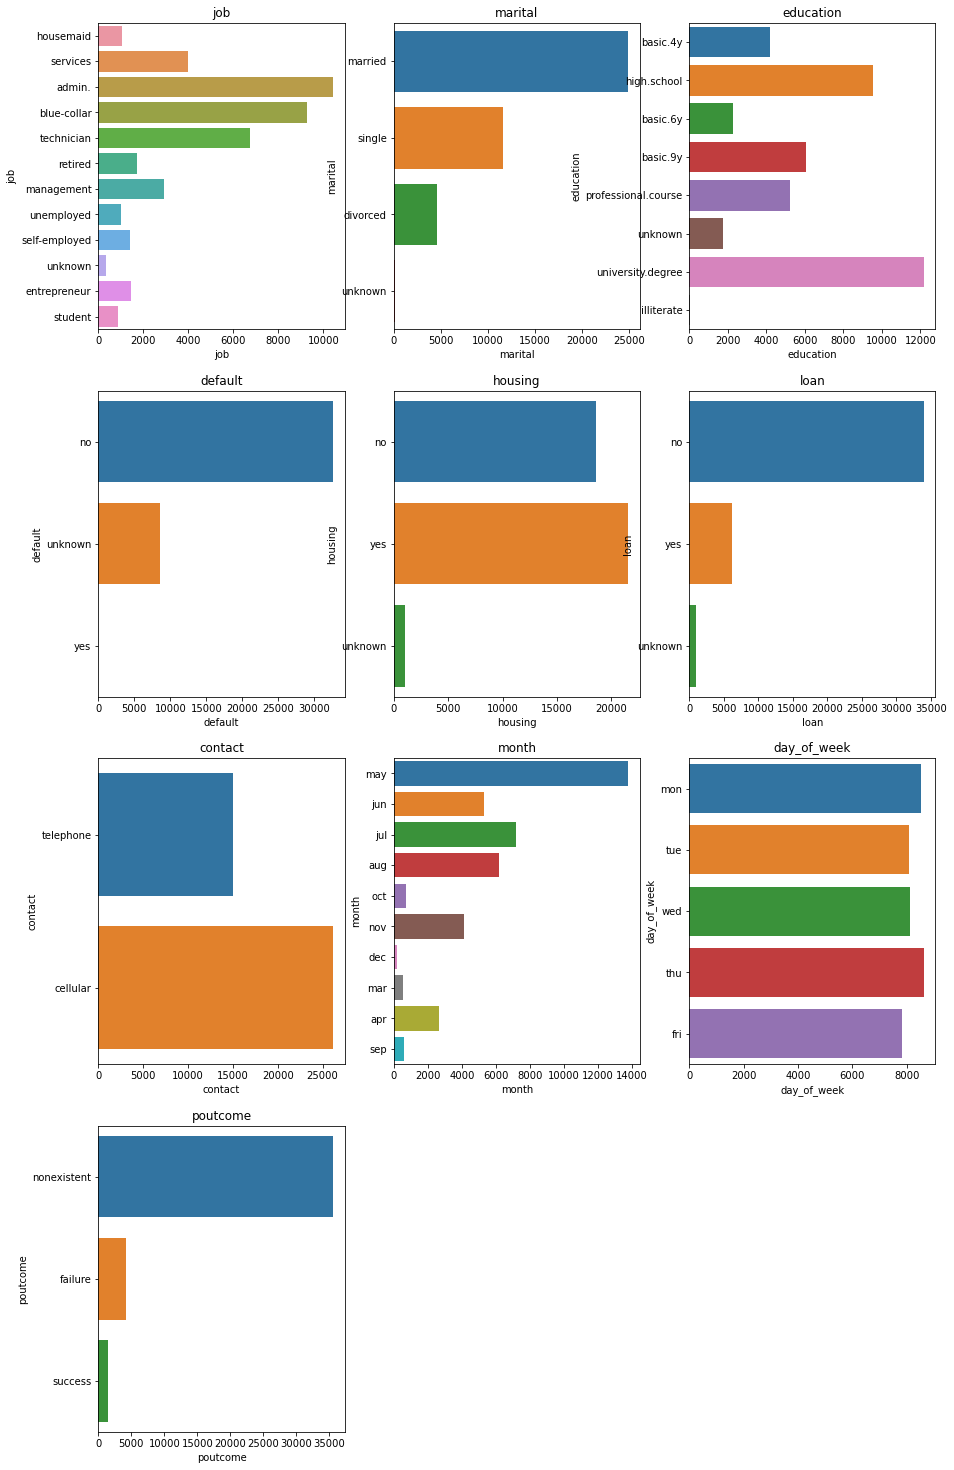

In [25]:
# Check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=data)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

### Some interesting insights:

* job column: job column contains not only the category but also the status of employement. It may be is worthwhile to separate them.
* 'month' column: december and may had especially low and high counts, respectively.

## Visualizing Numerical data distribution

In [26]:
numerical_features = [x for x in data.columns if (x not in categorical_features) & (x != 'y')]

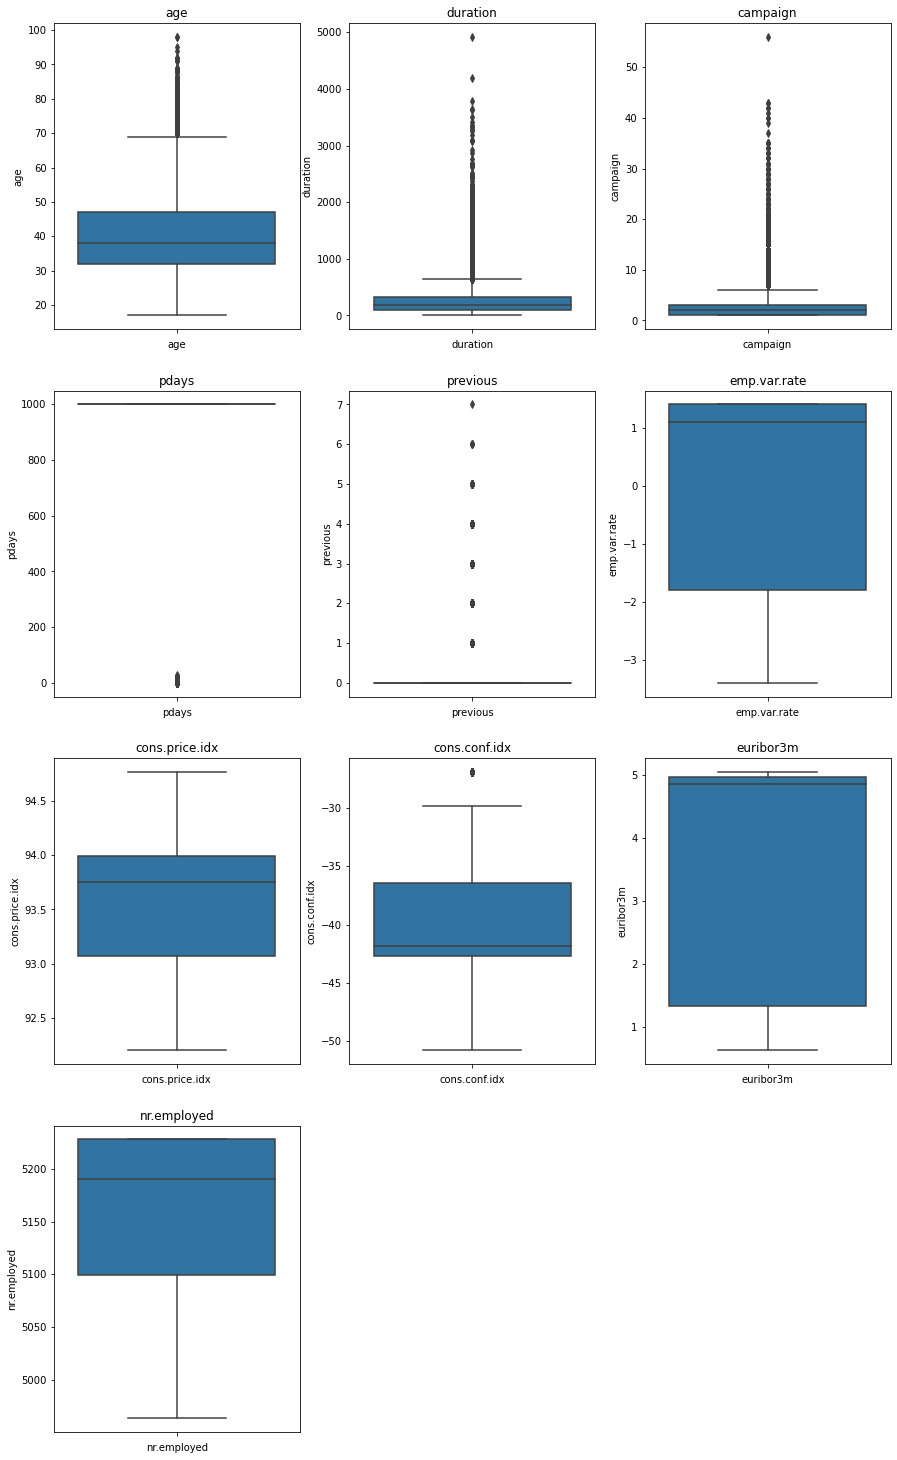

In [27]:
# Boxlplot of Numerical variables
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(y=numerical_feature,data=data)
    plt.xlabel(numerical_feature)
    plt.title(numerical_feature)
    plotnumber+=1
plt.show()

### Some interesting insights:

* 'age' column: most of age value is distributed under 75 with median value at mid 30s.
* 'balance' column: balance varied widely, but most of the value was concentrated near 0.
* 'pdays' column: number of days passed since the last marketing campaign seem to be around 0
* 'previous' column: mostly zero contacts were made previous to this marketing campaign.

## Visualizing conversion rate for each category

In [28]:
def groupby_deposit(col_list):
    return data.groupby(col_list)['y'].mean()

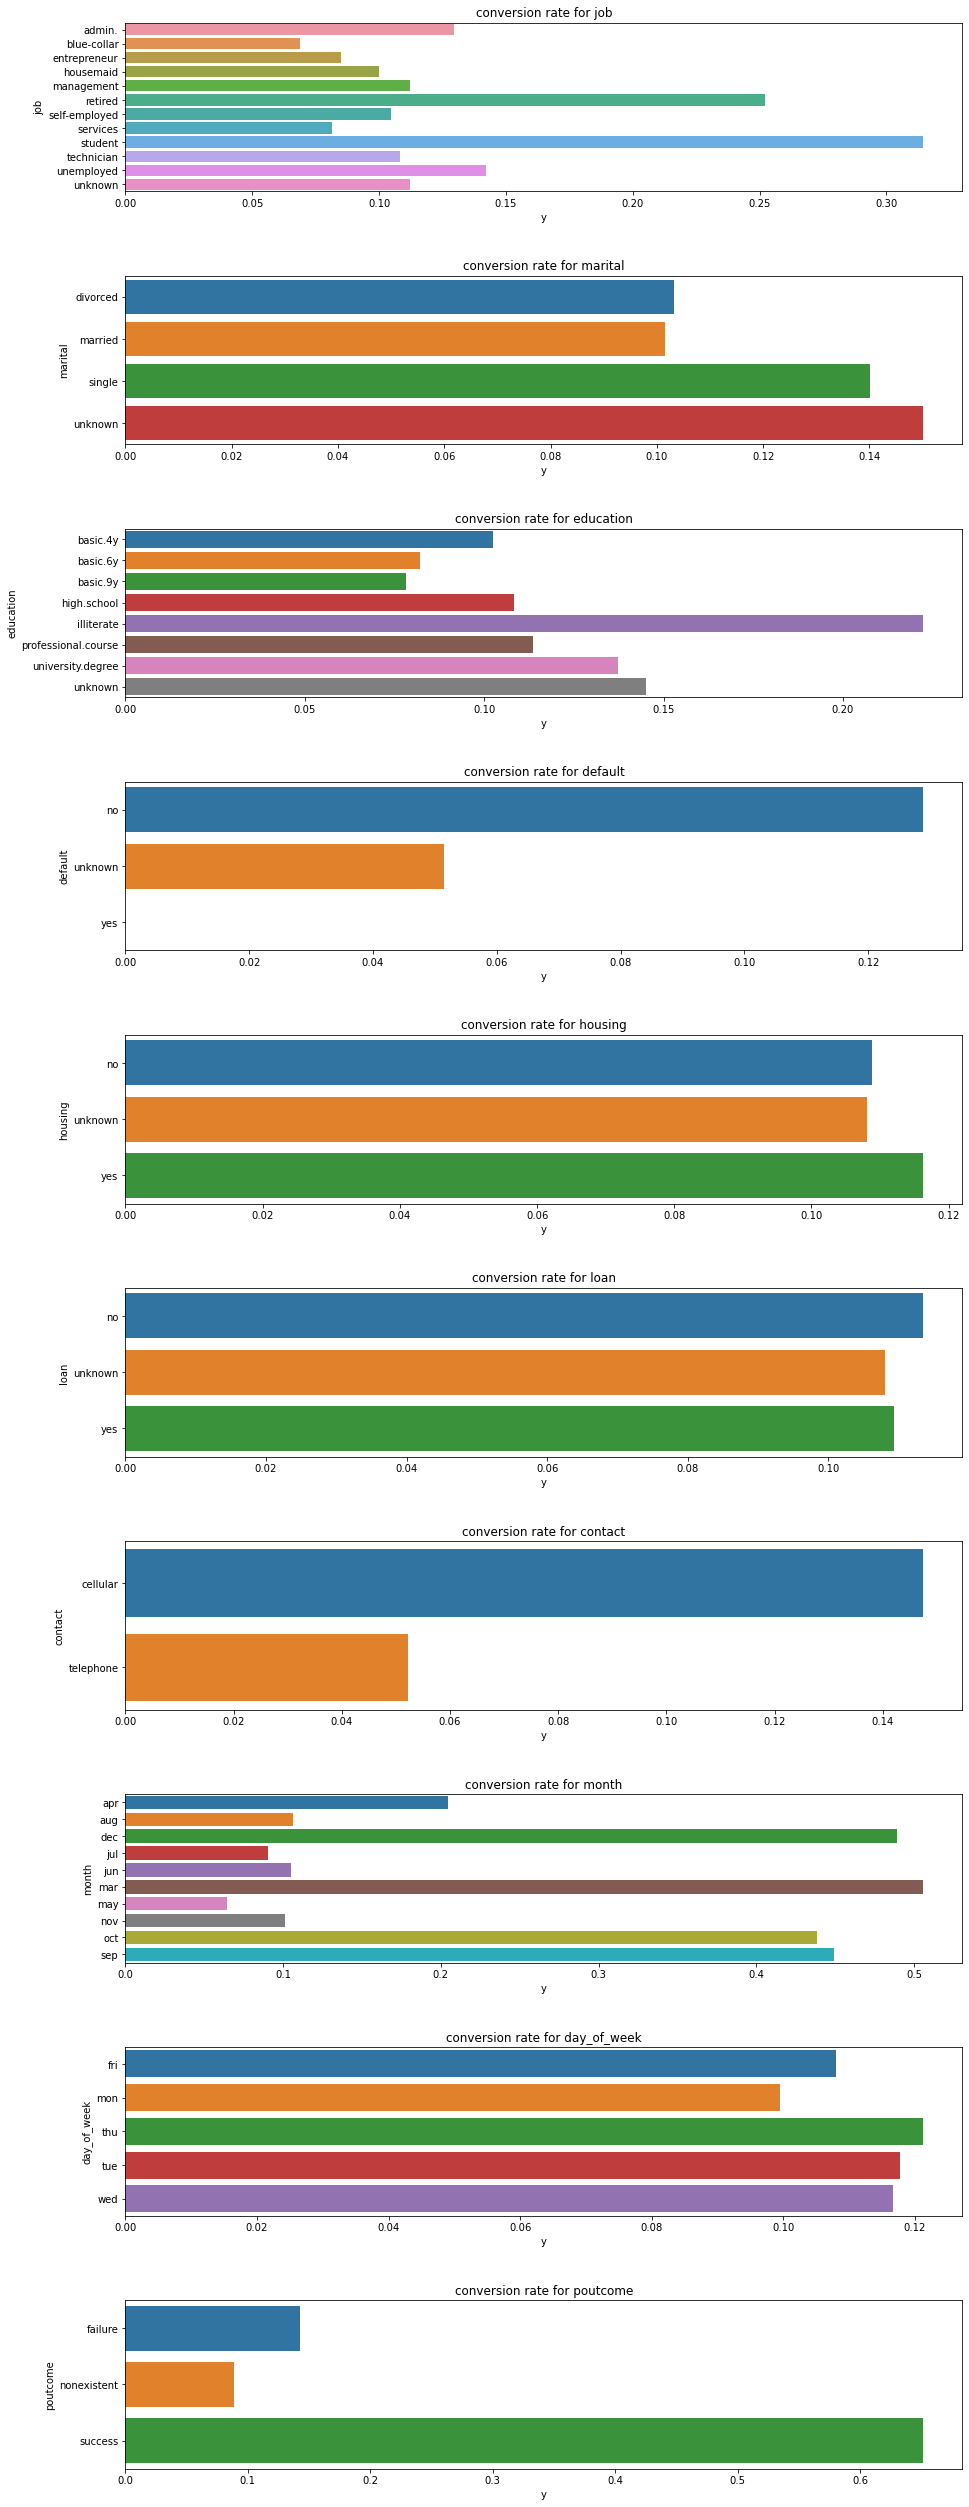

In [40]:
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(15, 45)) # create subplots
fig.subplots_adjust(hspace=.5) # adjust space between plots

for i, col in enumerate(categorical_features):
    df = groupby_deposit(col).to_frame().reset_index()
    sns.barplot(x=df['y'],\
                y=df[col].astype('category'),\
                ax=ax[i])
    
    ax[i].set_title('conversion rate for {}'.format(col))

### Some interesting insights:


* Retired and student clients had the highest conversion rate
  * One can hypothesize the reason as that their expenditures are mostly 'flat' without heavy fluctuations.
  * Retirees have retirement funds to work with while students often have living expense and tuition to worry about.
  

* Clients with occupations of Blue-collar, entreprenuer, service, housemaid and service had low conversion rate
    * One can hypothesize that these jobs are typically not high-paying and those with low paying jobs are less likely to have liquidity
    * Entrepreneurs have low rate of success in general (80% fail in 5 years) and they are often low on runway.
    
   

* Married clients are less likely to open a deposit
    * Married clients are more likely to have children, which are big financial investments. This also means that they are less likely to have liquidity
    
    
* Greater the level of education, higher the likelihood of conversion was
    * Hypothesis: those with more education may get paid more and therefore better off, leaving them with more fund they are comfortable with being "locked up" at the expense of higher interest rate
    
    
* Those with default experiences are less likely to have money in hand that they are comfortable 'locking up' for few months/years


* Ones with any kind of loans had lower conversion rate
    * Those with any kind of loan (housing or personal) are less likely to have cash they are comfortable 'locking up' for some period of time
    
    
* Clients contacted with 'cellular' phone have higher chance of conversion than those contacted with 'telphone'
    * Is this because younger people are more likely to have cellphone than older population?
    
    
* There are many seasonal industries/business, and opening up deposit may be one of them
* month of december, march, september and october had the higher conversion rate than other months


* Previous sucess in marketing campaign results in higher conversion rate that is statistically significant enough

## Correlation between numerical variables

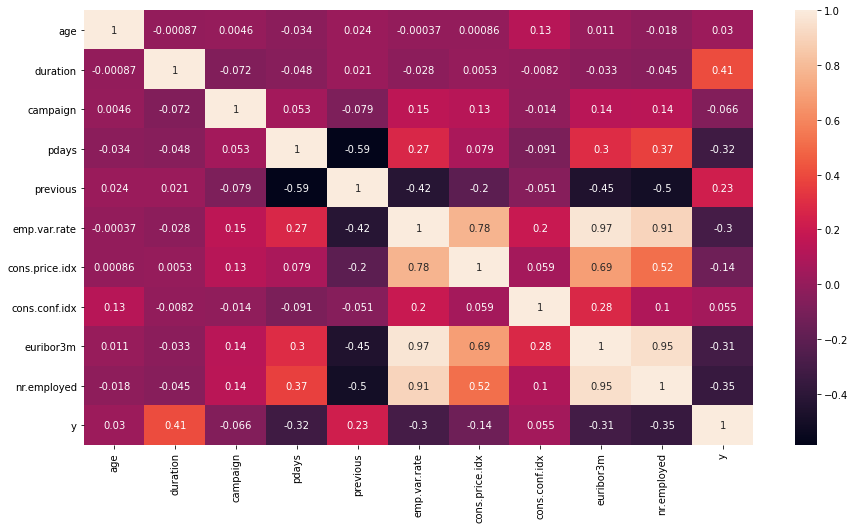

In [14]:
cor= data.corr()
plt.figure(figsize=(15, 8))

sns.heatmap(cor,annot=True)

plt.show()

### Some interesting insights:

1. High correlation between `duration` and `y`, which is obvious because as the duration of the call increases, there is a higher chance of acceptance.  

2. `pdays` and `previous` are strongly correlated as they both pertain to previous campaign experience.

3. We may only use one of two columns, pdays and previous, for the fitting the model due to multi-coliniarity, but it is unsure at this point.


## Visualizing conversion rate for each numerical variable

Text(0, 0.5, 'Conversion rate (1=100%)')

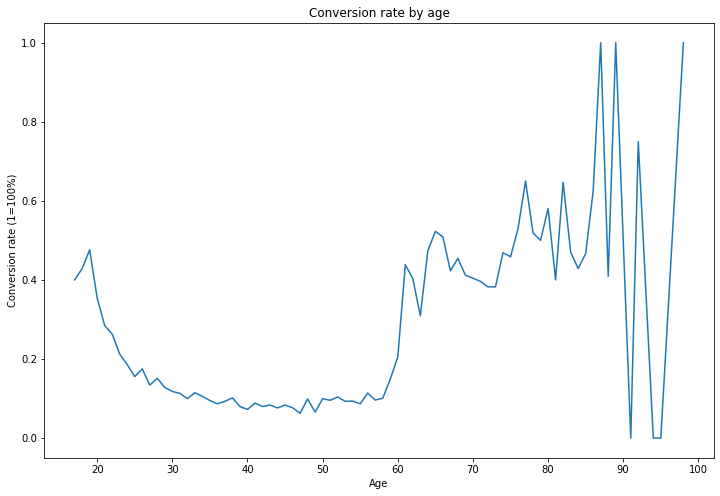

In [13]:
# Age column 
df_age = data.groupby('age')['y'].mean().to_frame().reset_index() # conversion rate by age
plt.figure(figsize=(12,8))
ax = sns.lineplot(x='age', y='y', data=df_age)
plt.title('Conversion rate by age')
plt.xlabel('Age')
plt.ylabel('Conversion rate (1=100%)')

* Those under 30 and over 60 are much more likely to open a deposit from this marketing campaign

    * Hypothesis 1. While age of 30 to 60 are in prime working age, they are ones who are most likely to spend lot of money (Child, housing, etc.) and therefore are low on equity
    * Hypothesis 2. Those in the age bracket of 30-60 tend to have consistent source of income for stability and therefore are more intereseted in riskier investment options wiht greater returns (ex. stocks)

Text(0, 0.5, 'Conversion rate (1=100%)')

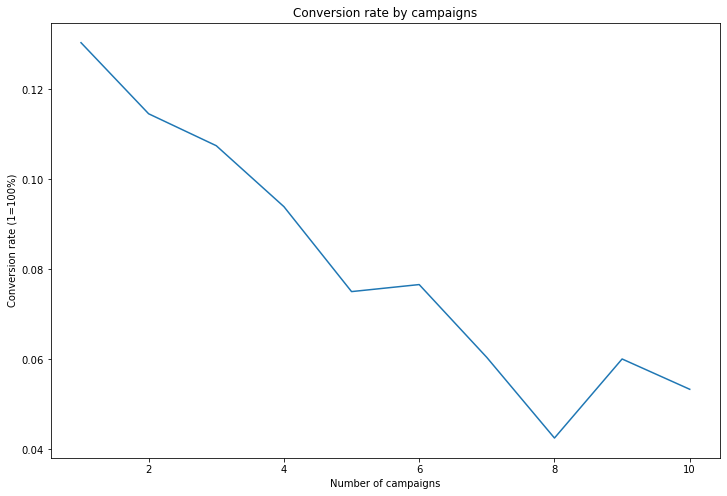

In [17]:
# Campaign column 
df_camp = data.groupby('campaign')['y'].mean().to_frame().reset_index() # conversion rate by age
plt.figure(figsize=(12,8))
ax = sns.lineplot(x='campaign', y='y', data=df_camp[df_camp['campaign'] <= 10])
plt.title('Conversion rate by campaigns')
plt.xlabel('Number of campaigns')
plt.ylabel('Conversion rate (1=100%)')

* Additional contacts beyond the first diminishes the conversion rate
    * It is true that some may need more than 1 contacts to complete the process, as metioned in the beginning
    * The number of contacts which the conversion ratio diminishes greatly begins after the 3rd call

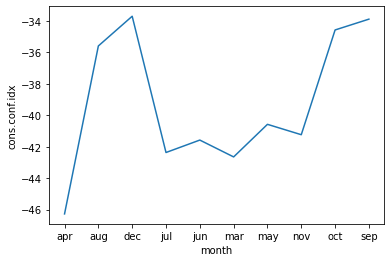

In [36]:
# Average consumer confidence during each month
df_conf = data.groupby('month')['cons.conf.idx'].mean().to_frame().reset_index()

sns.lineplot(x = df_conf['month'], y = df_conf['cons.conf.idx'])

## Final Recommendations


* The bank should focus on students, retired and unemployed audience since they have the highest conversion rates. 
* The bank should pick single persons for the marketing campaigns. 
* The bank should focus mainly on illetrate students. Other than that, it should target the highly educated population since more education usually means more liquidity.  
* The bank should mainly focus on cellular campaigns rather than telephonic ones. 
* The bank should focus their marketing campaigns on the customers with low default history and no previous loans. 
* The bank should target the months of Spetember, October, December, March and April for the marketing campaigns.
* The bank should focus their campaign on two age groups - below 30 and above 60. 
* The bank should limit the number of contacts per customer to 3. 